In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
gdf = gpd.read_file("shapes/WI_VRA18_edited/")

In [4]:
gdf.columns

Index(['FID', 'GEOID', 'COUNTYFP', 'COUNTY', 'NAME', 'DISTRICT', 'POP', 'VAP',
       'WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMIN', 'NHPI', 'OTHER',
       'OTHERMLT', 'WHITE18', 'BLACK18', 'HISPANIC18', 'ASIAN18', 'AMIN18',
       'NHPI18', 'OTHER18', 'OTHERMLT18', 'GOVTOT18', 'GOVR18', 'GOVD18',
       'SOSTOT18', 'SOSR18', 'SOSD18', 'TRESTOT18', 'TRESR18', 'TRESD18',
       'Shape_STAr', 'Shape_STLe', 'SHAPE_Leng', 'SHAPE_Area', 'ID',
       'LG18P_KOBE', 'LG18P_BARN', 'GOV18P_FLY', 'GOV18P_EVE', 'GOV18P_MCC',
       'GOV18P_MIT', 'GOV18P_ROY', 'GOV18P_SOG', 'GOV18P_VIN', 'SOS18P_LAF',
       'SOS18P_MAR', 'TRES18P_SA', 'TRES18P_KA', 'GOV18P_GOL', 'WVAP', 'BVAP',
       'HVAP', 'ASIANVAP', 'AMINVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP',
       'geometry'],
      dtype='object')

In [6]:
vaps = ["WVAP", "BVAP", "HVAP", "ASIANVAP", "AMINVAP", "NHPIVAP", "OTHERVAP", "2MOREVAP"]

In [13]:
gdf["WVAP_pct"] = gdf["WVAP"] / gdf[vaps].sum(axis=1)
gdf["POCVAP_pct"] = 1 - gdf["WVAP_pct"]
gdf["Barnes_pct"] = gdf["LG18P_BARN"] / (gdf["LG18P_BARN"] + gdf["LG18P_KOBE"])
gdf["Martin_pct"] = gdf["SOS18P_MAR"] / (gdf["SOS18P_MAR"] + gdf["SOS18P_LAF"])
gdf["Mitchell_pct"] = gdf["GOV18P_MIT"] / (gdf["GOV18P_MIT"] + gdf["GOV18P_ROY"] + gdf["GOV18P_SOG"] + gdf["GOV18P_VIN"] + gdf["GOV18P_MCC"] + gdf["GOV18P_EVE"] + gdf["GOV18P_FLY"])

In [32]:
def plot_scatter(candidate):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(gdf["POCVAP_pct"], 
               gdf[f"{candidate}_pct"])
    ax.set_xlabel("POCVAP Share", fontsize=24)
    ax.set_ylabel(f"{candidate} share", fontsize=24)
    plt.savefig(f"{candidate}.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return

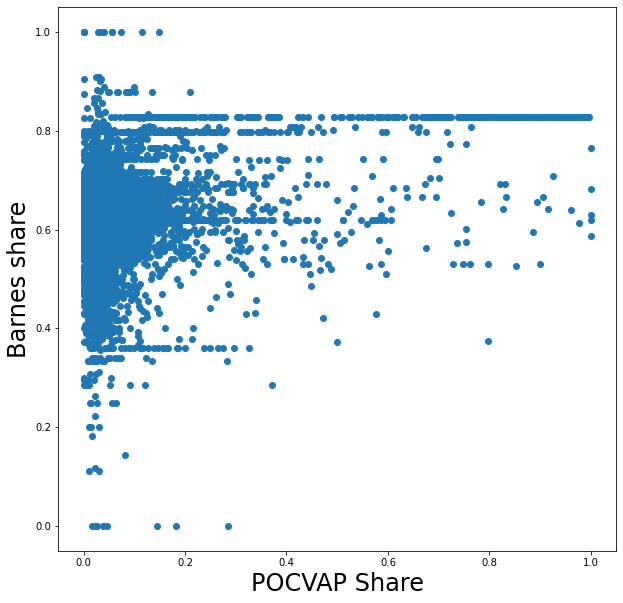

In [33]:
plot_scatter("Barnes")

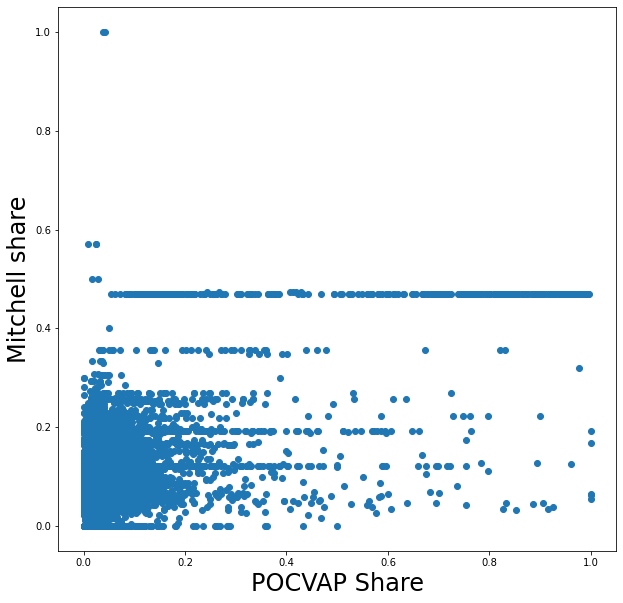

In [34]:
plot_scatter("Mitchell")

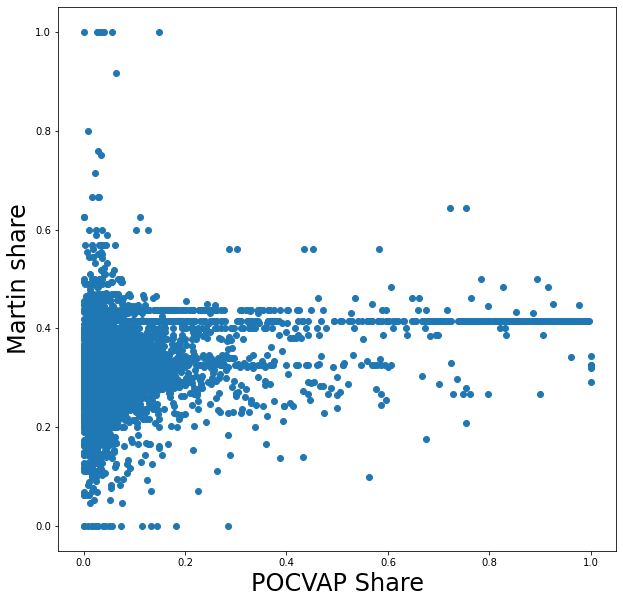

In [35]:
plot_scatter("Martin")